In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sms.csv')

In [3]:
df.sample(5)

,label,message
33,spam,Today's Offer! Claim ur å£150 worth of discoun...
35,spam,You will recieve your tone within the next 24h...
36,ham,Jay says that you're a double-faggot
3,ham,U dun say so early hor... U c already then say...
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [4]:
df.shape

(100, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    100 non-null    object
 1   message  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [6]:
import pandas as pd

# Example DataFrame creation code
data = {
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C'],
    'Column3': [True, False, True]
}

# Create DataFrame
sms = pd.DataFrame(data)

# Verify column names
print(sms.columns)


Index(['Column1', 'Column2', 'Column3'], dtype='object')


In [7]:
# renaming the cols
df.rename(columns={'label':'target','message':'text'},inplace=True)
df.sample(5)

,label,text
71,ham,Talk With Yourself Atleast Once In A Day...!!!...
45,ham,So there's a ring that comes with the guys cos...
61,spam,Last chance 2 claim ur å£150 worth of discount...
94,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."
56,ham,Surely result will offer:)


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
# Verify column names
print(df.columns)

# Check if 'label' column exists
if 'label' in df.columns:
    # Perform the necessary operations on the 'label' column
    df['label'] = encoder.fit_transform(df['label'])
else:
    # Handle the case when 'label' column does not exist
    print("'label' column does not exist in the DataFrame.")


Index(['label ', 'text'], dtype='object')
'label' column does not exist in the DataFrame.


In [10]:
# Verify column names
print(df.columns)

# Remove trailing whitespace from column names
sms.columns = sms.columns.str.strip()

# Check if 'label' column exists
if 'label' in sms.columns:
    # Perform the necessary operations on the 'label' column
    sms['label'] = encoder.fit_transform(df['label'])
else:
    # Handle the case when 'label' column does not exist
    print("'label' column does not exist in the DataFrame.")


Index(['label ', 'text'], dtype='object')
'label' column does not exist in the DataFrame.


In [11]:
# Print the first few rows of the DataFrame
print(df.head())

# Verify column names
print(df.columns)


  label                                                text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
Index(['label ', 'text'], dtype='object')


In [12]:
# Remove trailing whitespace from column names
df.columns = df.columns.str.strip()

# Verify column names after removing trailing whitespace
print(df.columns)


Index(['label', 'text'], dtype='object')


In [13]:
df['label'] = encoder.fit_transform(df['label'])

In [14]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [16]:
df.duplicated().sum()

6

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(94, 2)

In [20]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['label'].value_counts()

0    47
1    47
Name: label, dtype: int64

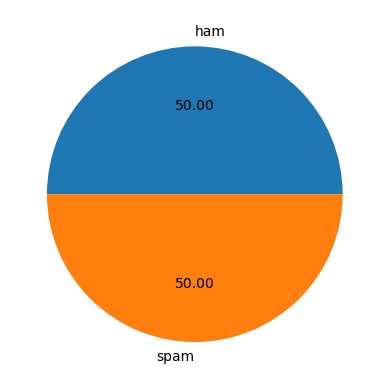

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91779\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,94.000000,94.000000,94.000000
mean,122.159574,26.478723,2.542553
std,61.135721,14.195053,1.514552
min,19.000000,5.000000,1.000000
25%,77.250000,17.250000,1.000000
50%,136.500000,27.000000,2.000000
75%,155.000000,32.000000,3.000000
max,372.000000,90.000000,7.000000


In [33]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,47.000000,47.000000,47.000000
mean,98.170213,23.319149,2.042553
std,77.932892,19.067508,1.382459
min,19.000000,5.000000,1.000000
25%,46.000000,10.500000,1.000000
50%,77.000000,18.000000,2.000000
75%,127.000000,29.500000,2.000000
max,372.000000,90.000000,7.000000


In [34]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,47.000000,47.000000,47.000000
mean,146.148936,29.638298,3.042553
std,17.517667,4.838368,1.488469
min,80.000000,15.000000,1.000000
25%,143.000000,27.000000,2.000000
50%,152.000000,30.000000,3.000000
75%,156.500000,32.000000,4.000000
max,163.000000,39.000000,7.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

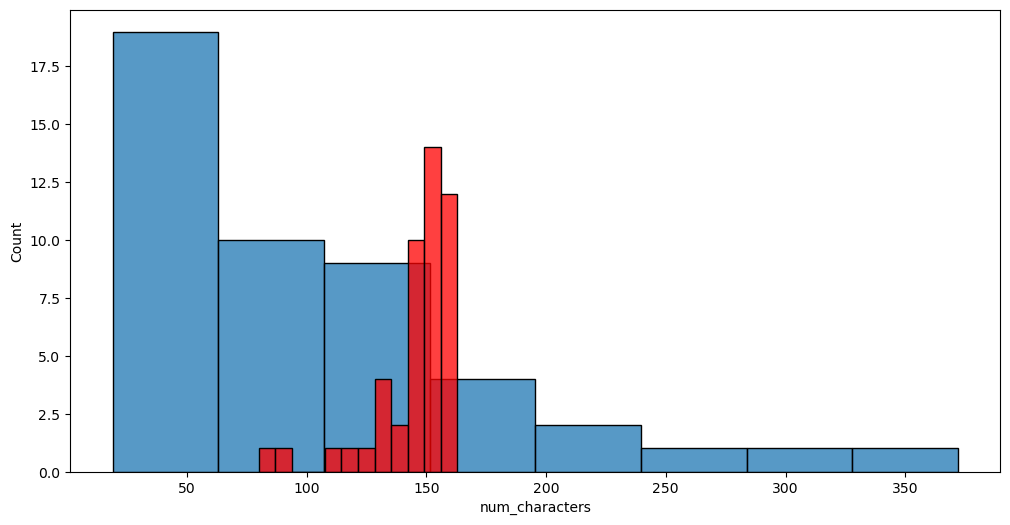

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

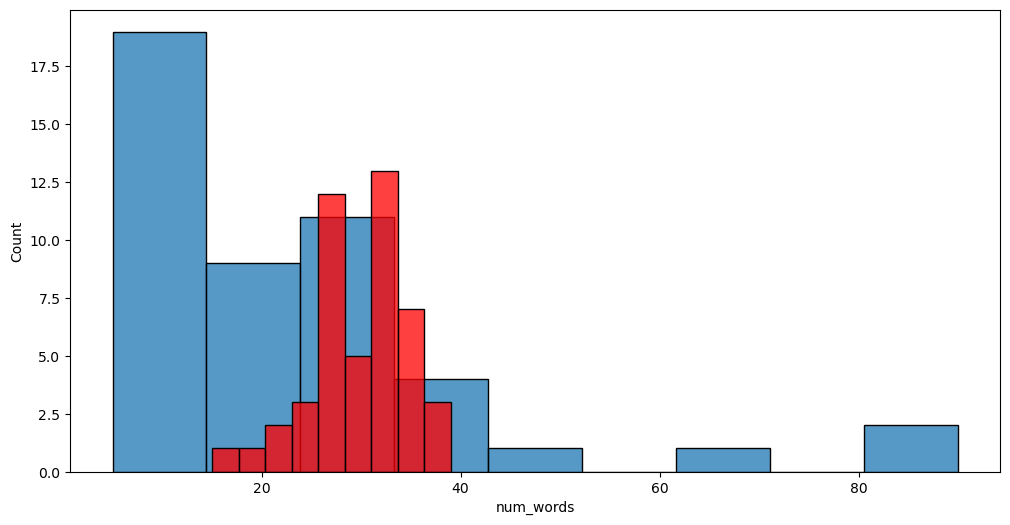

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

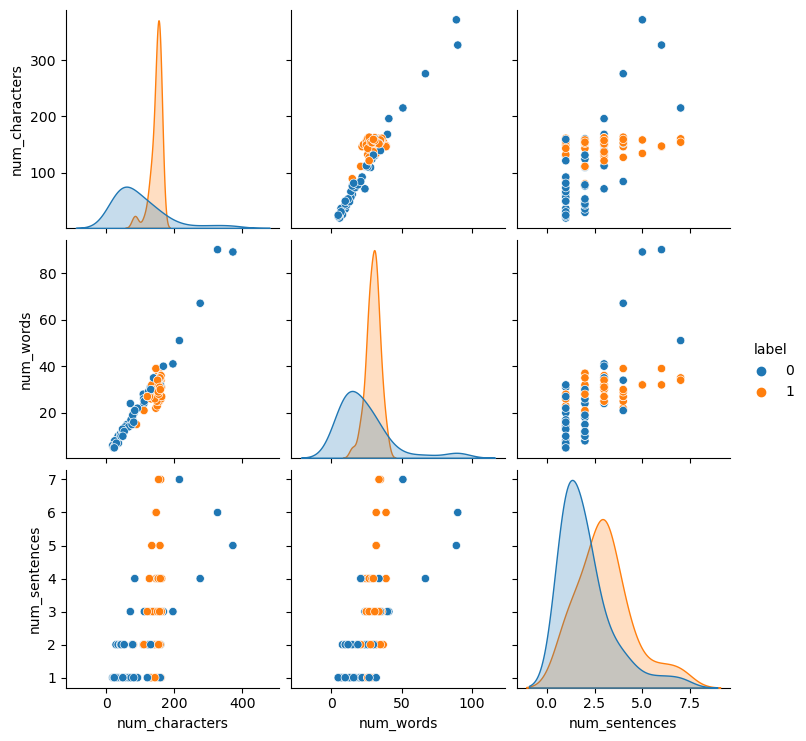

In [38]:
sns.pairplot(df,hue='label')

C:\Users\91779\AppData\Local\Temp\ipykernel_2984\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

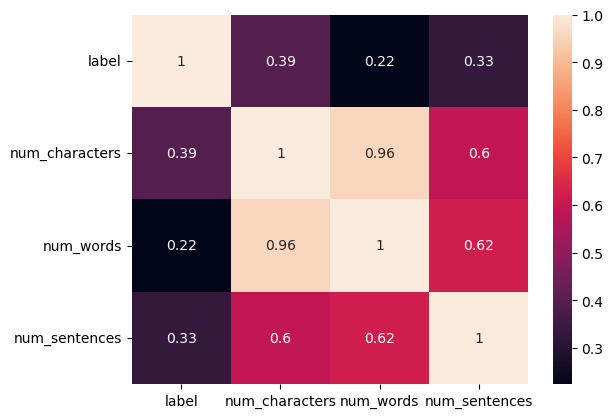

In [39]:
sns.heatmap(df.corr(),annot=True)

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()




In [42]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


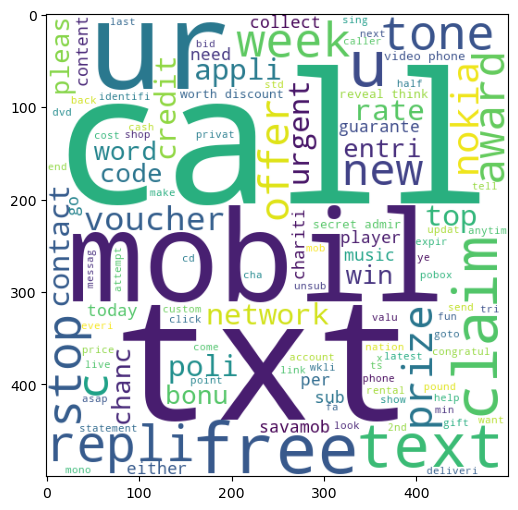

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

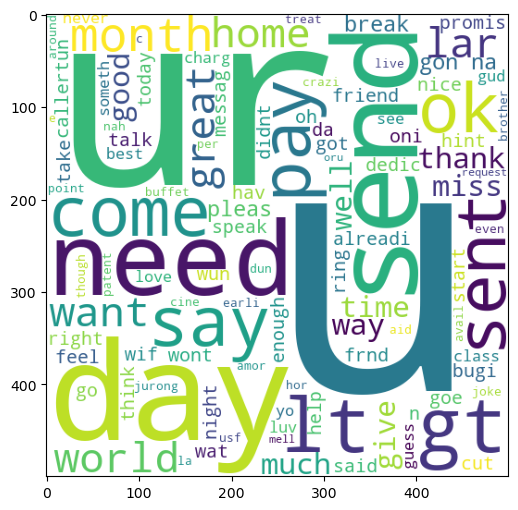

In [47]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

767

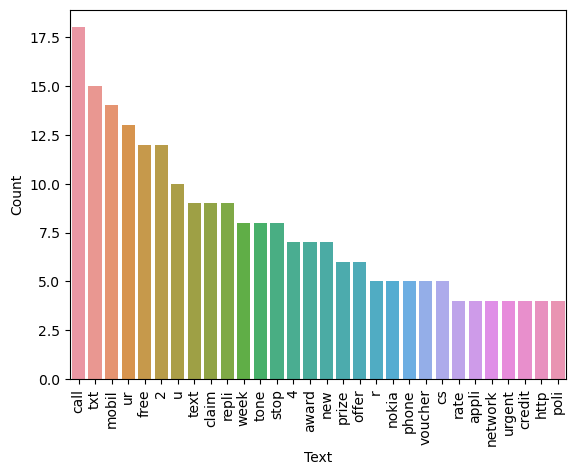

In [50]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

spam_counts = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_counts, columns=['Text', 'Count'])

sns.barplot(data=spam_df, x='Text', y='Count')
plt.xticks(rotation='vertical')
plt.show()


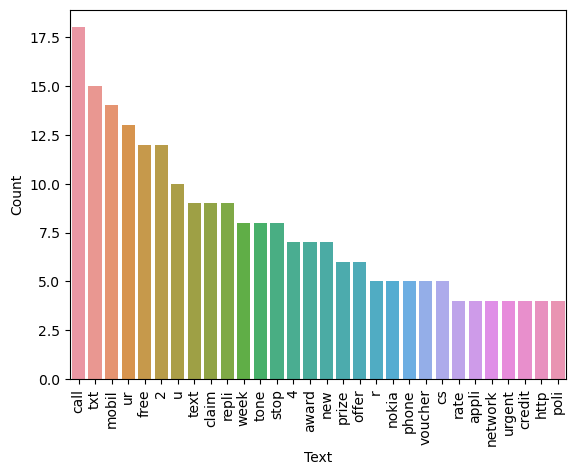

In [51]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

spam_counts = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_counts, columns=['Text', 'Count'])

sns.barplot(data=spam_df, x='Text', y='Count')
plt.xticks(rotation='vertical')
plt.show()



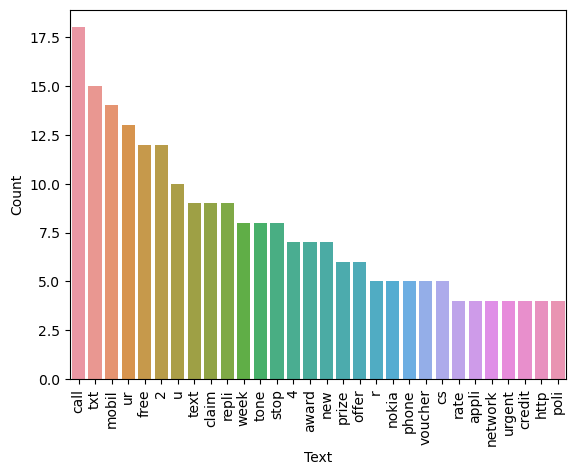

In [52]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

spam_counts = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_counts, columns=['Text', 'Count'])

sns.barplot(x='Text', y='Count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()


In [53]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

529

In [54]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
X.shape

(94, 713)

In [56]:
y = df['label'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8947368421052632
[[8 1]
 [1 9]]
0.9


In [57]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9473684210526315
[[9 0]
 [1 9]]
1.0


In [58]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8421052631578947
[[9 0]
 [3 7]]
1.0


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9473684210526315, 1.0)

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9473684210526315
Precision -  1.0
For  KN
Accuracy -  0.8421052631578947
Precision -  0.8181818181818182
For  NB
Accuracy -  0.9473684210526315
Precision -  1.0
For  DT
Accuracy -  0.8947368421052632
Precision -  1.0
For  LR
Accuracy -  0.5789473684210527
Precision -  1.0
For  RF
Accuracy -  0.8421052631578947
Precision -  1.0
For  AdaBoost
Accuracy -  0.8947368421052632
Precision -  1.0
For  BgC
Accuracy -  0.8947368421052632
Precision -  1.0
For  ETC
Accuracy -  0.8421052631578947
Precision -  1.0
For  GBDT
Accuracy -  0.8947368421052632
Precision -  1.0
For  xgb
Accuracy -  0.8947368421052632
Precision -  1.0


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.947368,1.000000
2,NB,0.947368,1.000000
3,DT,0.894737,1.000000
4,LR,0.578947,1.000000
5,RF,0.842105,1.000000
6,AdaBoost,0.894737,1.000000
7,BgC,0.894737,1.000000
8,ETC,0.842105,1.000000
9,GBDT,0.894737,1.000000
10,xgb,0.894737,1.000000


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.947368
1,NB,Accuracy,0.947368
2,DT,Accuracy,0.894737
3,LR,Accuracy,0.578947
4,RF,Accuracy,0.842105
5,AdaBoost,Accuracy,0.894737
6,BgC,Accuracy,0.894737
7,ETC,Accuracy,0.842105
8,GBDT,Accuracy,0.894737
9,xgb,Accuracy,0.894737


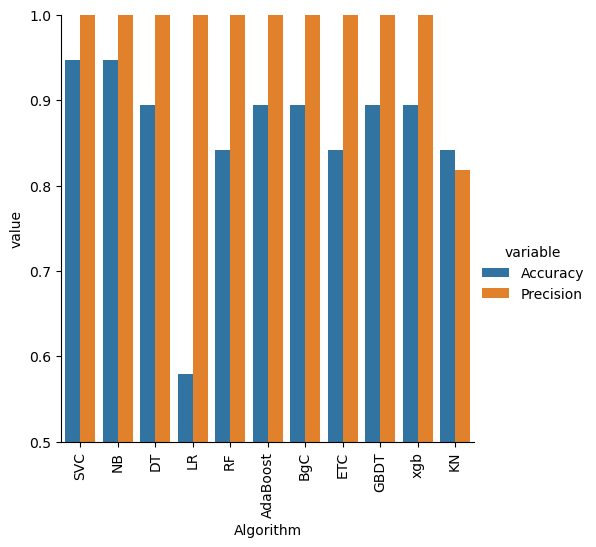

In [64]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.947368,1.000000,0.947368,1.000000,0.947368,1.000000,0.947368,1.000000
1,NB,0.947368,1.000000,0.947368,1.000000,0.947368,1.000000,0.947368,1.000000
2,DT,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000
3,LR,0.578947,1.000000,0.578947,1.000000,0.578947,1.000000,0.578947,1.000000
4,RF,0.842105,1.000000,0.842105,1.000000,0.842105,1.000000,0.842105,1.000000
5,AdaBoost,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000
6,BgC,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000
7,ETC,0.842105,1.000000,0.842105,1.000000,0.842105,1.000000,0.842105,1.000000
8,GBDT,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000
9,xgb,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000,0.894737,1.000000


In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [67]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9473684210526315
Precision 1.0


In [68]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9473684210526315
Precision 1.0


In [69]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of MultinomialNB
nb_classifier = MultinomialNB()

# Fit the classifier with your training data
nb_classifier.fit(X_train, y_train)

# Now you can use the fitted classifier for prediction or other tasks
predictions = nb_classifier.predict(X_test)


In [70]:
import pandas as pd

# Replace 'path/to/your/dataset.csv' with the actual path to your dataset file
dataset_path = 'C:/Users/91779/Desktop/running/sms.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Extract the feature column (X) and target column (y)
X_train = df['message']
y_train = df['label ']


In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))